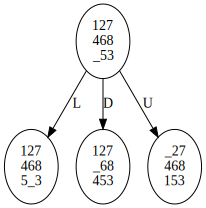

In [1]:
from graphviz import Digraph

dot = Digraph()
dot.node('0', '127\n468\n_53')
dot.node('1', '127\n468\n5_3')
dot.node('2', '127\n_68\n453')
dot.node('3', '_27\n468\n153')
dot.edge('0', '1', 'L')
dot.edge('0', '2', 'D')
dot.edge('0', '3', 'U')

dot

In [2]:
from graphviz import Digraph
from collections import deque
from copy import deepcopy


class Node:
    def __init__(self, state, parent=None, action=None, cost=0):
        self.state = state
        self.id = str(self)  # identifier of node
        self.parent = parent
        self.action = action
        self.cost = cost

    def __str__(self):
        return '\n'.join([' '.join(map(str, row)) for row in self.state])

    def __eq__(self, other):
        return self.state == other.state

    def get_blank_position(self):
        for i in range(len(self.state)):
            for j in range(len(self.state[i])):
                if self.state[i][j] == 0:
                    return i, j

    def get_successors(self):
        successors = []
        moves = [(0, 1, 'L'), (0, -1, 'R'), (1, 0, 'U'), (-1, 0, 'D')]
        blank_i, blank_j = self.get_blank_position()

        for move in moves:
            new_i, new_j = blank_i + move[0], blank_j + move[1]
            if 0 <= new_i < len(self.state) and 0 <= new_j < len(self.state[0]):
                new_state = deepcopy(self.state)
                new_state[blank_i][blank_j], new_state[new_i][new_j] = new_state[new_i][new_j], new_state[blank_i][blank_j]
                cost = self.cost + 1  # Increment cost by 1 for each move
                successors.append(Node(new_state, parent=self, action=move[2], cost=cost))

        return successors

    def get_successor(self, action, state):
      pi, pj = self.get_blank_pos(state)
      pi, pj = self.get_dest_pos(action, pi, pj)
      if 0 <= pi and pi < 3 and 0 <= pj and pj < 3:
        if action == 'L':
          state[pi][pj - 1] = state[pi][pj]
        if action == 'R':
          state[pi][pj + 1] = state[pi][pj]
        if action == 'U':
          state[pi-1][pj] = state[pi][pj]
        if action == 'D':
          state[pi+1][pj] = state[pi][pj]
        state[pi][pj] = 0
        return state
      return None

    def get_dest_pos(self, action, pi, pj):
        if action == 'L':
            pj += 1
        if action == 'R':
            pj -= 1
        if action == 'U':
            pi += 1
        if action == 'D':
            pi -= 1
        return pi, pj

    def get_blank_pos(self, state):

        for i in range(len(state)):
            for j in range(len(state[i])):
                if state[i][j] == 0:
                    return i, j

    def get_id(self):
        return self.id

    def get_node_str(self):
        return str(self)

    def get_action(self):
        return self.action

    def draw(self, dot):
        dot.node(self.get_id(), self.get_node_str())
        if self.parent is not None:
            dot.edge(self.parent.get_id(), self.get_id(), self.get_action())


    def is_goal_state(self, goal_states):
          for goal_state in goal_states:
              if self.state == goal_state:
                  return True
          return False

    def get_id(self):
        return str(self.state)

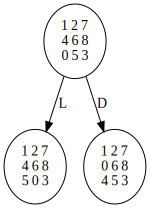

In [3]:
def expand(dot, node):
  successors = node.get_successors()
  for successor in successors:
      successor.draw(dot)

n = Node([[1, 2, 7],   # Adjust these states if needed for testing
        [4, 6, 8],
        [0, 5, 3]])
dot = Digraph()
n.draw(dot)
expand(dot, n)

dot

Actions: ['U', 'L', 'D', 'R', 'U', 'U', 'L', 'D', 'L']
Total Cost: 385


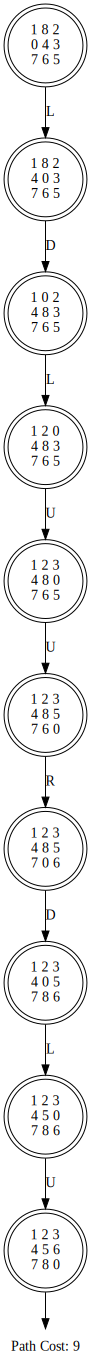

In [4]:
from collections import deque
from graphviz import Digraph


def graph_search(node, goal):
    dot = Digraph()
    frontier = deque()
    explored = set()
    frontier.append((node, []))  # Thêm solution_path vào frontier

    solution_path = []  # Mảng chứa solution path
    total_cost = 1  # Khởi tạo giá trị total_cost
    actions = []  # Danh sách hướng di chuyển
    while frontier:
        current_node, path = frontier.popleft()  # Lấy node và path từ frontier
        explored.add(current_node.get_id())

        successors = current_node.get_successors()
        for successor in successors:
            if successor.state == goal.state:
                current = successor
                while current is not None:
                    current_node_id = current.get_id()
                    dot.node(current_node_id, current.get_node_str()\
                             , shape='doublecircle')
                    if current.parent is not None:
                        dot.edge(current.parent.get_id() \
                             , current_node_id, label=current.action)
                        actions.append(current.action)
                         # Thêm action vào danh sách actions

                    solution_path.append(current)
                     # Thêm state vào solution path
                    current = current.parent

                # Hiển thị độ dài của solution path phía dưới goal state
                path_cost = len(solution_path) - 1
                dot.node(f'Path_Cost_{path_cost}' \
                             , label=f'Path Cost: {path_cost}' \
                             , shape='plaintext')
                dot.edge(successor.get_id()\
                             , f'Path_Cost_{path_cost}', label='')

                return dot, solution_path, actions, total_cost
                 # Trừ đi trạng thái ban đầu từ solution path

            if successor.get_id() not in explored and \
             (successor, path + [successor]) not in frontier:
               # Kiểm tra cả path khi thêm vào frontier
                frontier.append((successor, path + [successor]))
               # Thêm node và path vào frontier
                total_cost += 1
              # Tăng giá trị total_cost lên 1 mỗi khi thêm một cạnh vào frontier

    return dot, solution_path, actions, total_cost

# Example usage:

n = Node([[1, 8, 2], [0, 4, 3], [7, 6, 5]])

goal1 = Node([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 0]])

goal2 = Node([[0, 1, 2],
         [3, 4, 5],
         [6, 7, 8]])

# Create a list of goal states
goal_states = [goal1, goal2]
dot, solution_path, actions, total_cost = graph_search(n, goal1)
print("Actions:", actions)
print("Total Cost:", total_cost)
dot


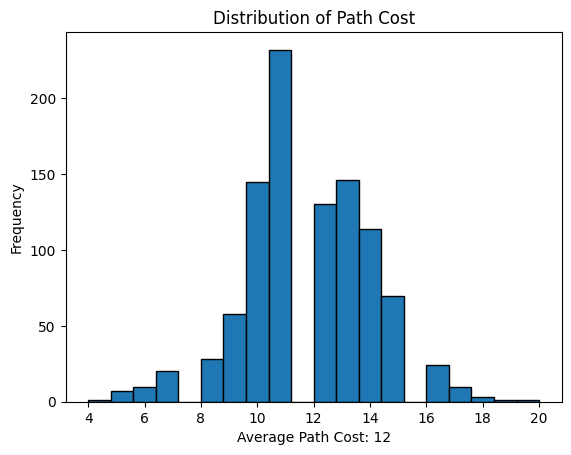

In [5]:
import random
import matplotlib.pyplot as plt

def check_puzzle_solveability(puzzle_state):
    def is_valid_state(state):
        flattened_state = [num for row in state for num in row]
        flattened_state.remove(0)

        for num in range(1, 9):
            if num not in flattened_state:
                return False

        return True

    def count_inversions(state):
        inversions = 0
        n = len(state)

        flattened_state = [num for row in state for num in row if num != 0]

        for i in range(len(flattened_state)):
            for j in range(i + 1, len(flattened_state)):
                if flattened_state[i] > flattened_state[j]:
                    inversions += 1

        return inversions

    if not is_valid_state(puzzle_state):
        return False

    inversions = count_inversions(puzzle_state)

    if inversions % 2 == 0:
        return True
    else:
        return False


def randomize_puzzle():
    puzzle = Node([[1, 8, 2], [0, 4, 3], [7, 6, 5]])
    moves = [(0, 1, 'L'), (0, -1, 'R'), (1, 0, 'U'), (-1, 0, 'D')]

    for _ in range(10):
        move = random.choice(moves)
        blank_i, blank_j = puzzle.get_blank_position()
        new_i, new_j = blank_i + move[0], blank_j + move[1]

        if 0 <= new_i < len(puzzle.state) and 0 <= new_j < len(puzzle.state[0]):
            puzzle.state[blank_i][blank_j] \
            , puzzle.state[new_i][new_j] = puzzle.state[new_i][new_j] \
            , puzzle.state[blank_i][blank_j]

    return puzzle.state


for _ in range(1000):
    random_puzzle = randomize_puzzle()
    solvable = check_puzzle_solveability(random_puzzle)

    if not solvable:
        continue


# Generate 1000 random puzzles
random_puzzles = [randomize_puzzle() for _ in range(1000)]
goal1 = Node([[1, 2, 3],
         [4, 5, 6],
         [7, 8, 0]])

# Create a list of goal states
goal_states = [goal1, goal2]
# Calculate total cost for each puzzle
total_costs = []
total_cost= 0

for puzzle in random_puzzles:
    start_node = Node(puzzle)
    dot, solution_path, action, total = graph_search(start_node, goal1)
    total_cost = len(solution_path)
    total_costs.append(total_cost)


average_path_cost = sum(total_costs) / len(total_costs)
plt.hist(total_costs, bins=20, edgecolor='black')
plt.xlabel(f'Average Path Cost: {average_path_cost:.0f}')
plt.ylabel('Frequency')
plt.title('Distribution of Path Cost')
plt.show()